<a href="https://colab.research.google.com/github/Raidin/HowDoDeepLearning/blob/remind_basic_skill/Activation_Function_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activation Function Summary**
---
> Activation Function(활성화 함수)는 Neural Network의 입력신호를 출력 신호롸 변환하는 함수이다. 활성화 함수는 대개 비선형함수(non-linear function)을 사용하며, 자주 사용되는 함수는 아래와 같다.
* Sigmoid
* Hyperbolic Tangent
* Relu
* Leaky Relu
* PRelu
* ELU


>  [Wikipedia URL](https://en.wikipedia.org/wiki/Activation_function)



In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def EachFunctinDraw(*args) :
    plt.figure(figsize=(8, 8))

    plt.plot(x, args[1], label=args[0], linewidth='1.0', linestyle="-")

    # plt.grid(True)
    plt.grid(alpha=.9,linestyle='--')
    plt.title(args[0])
    plt.legend(loc='upper left')

    '''
    Equation Display
    '''
    plt.text(0.2, 0.2, args[2], fontsize=15)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()


In [0]:
def MergeFunctionDraw(**kwarg):
    plt.figure(figsize=(10, 10))

    for key, value in kwarg.items():
        plt.plot(x, value, label=key, linewidth='1.0', linestyle="-")

    # plt.grid(True)
    plt.grid(alpha=.4,linestyle='--')
    plt.title('Activation Function')
    plt.legend(loc='upper left')

    '''
    axis 가운데로 정렬
    '''
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()


### 1. Sigmoid
---
![Sigmoid](https://docs.google.com/uc?export=download&id=1oyB_USLgyQ2IOrPw7gfyL1jx0tpl9gUT)
* Sigmoid 함수는 로지스틱 함수로도 불리며 출력 값의 범위는 [0 : 1]이고, 입력값이 크면 1, 작으면 0에 수렴 되는 특징을 가진다.
* 장점
  * Empty
* 단점
  * Sigmoid함수를 미분했을 때, 최대 값은 0.25이다. 즉, 층(layer)가 깊을수록 기울기가 0으로 수렴되어 gradient값이 작아지게 되어 학습이 잘 되지 않는 문제가 생긴다.
  * 지수함수(exponential)연산을 하여 학습이 느려지는 단점이 있다.

In [0]:
def Sigmoid(x):
    # Sigmoid = lambda x: 1 / (1 + np.exp(-x))
    return 1 / (1 + np.exp(-x))


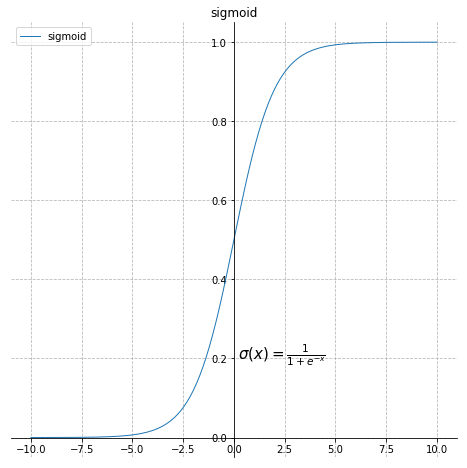

In [30]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$\sigma(x)=\frac{1}{1+e^{-x}}$'
activation = Sigmoid(x)
EachFunctinDraw('sigmoid', activation, eq);

### 2. Hyperbolic Tangent
---
> Tanh 함수는 Sigmoid 함수의 크기와 위치를 조절한 함수로 [-1:1] 범위의 출력 값을 가진다.
* tanh 함수도 마찬가지로 입력 값이 크거나 작은경우 기울기가 0으로 수렴하여 gradient 값이 작아지게 되어 학습이 잘 되지 않는 문제가 발생한다.
* 함수의 출력 값이 0에 대해서 대칭(zero-centered)으로 학습시 수렴속도가 sigmoid보다 빠르다.

In [0]:
def HyperbolicTangent(x):
    # return 2 / (1 + np.exp(-2 * x)) - 1
    return 2 * Sigmoid(2 * x) -1

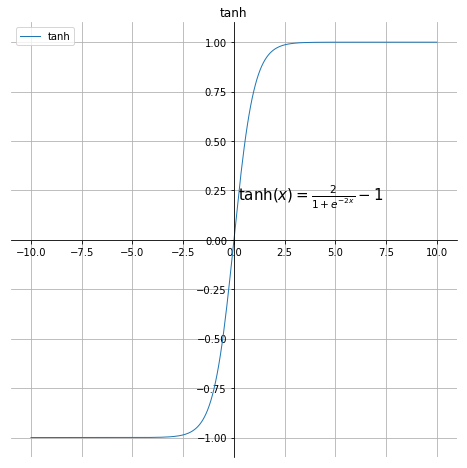

In [0]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$\tanh (x)=\frac{2}{1+e^{-2 x}}-1$'
activation = HyperbolicTangent(x)
EachFunctinGraph('tanh', activation, eq);

### 3. Relu
---
> Relu(Rectified Linear Unit)은 가장 인기 있는 활성화 함수 이다.[0:1]사이의 범위를 가지며 x > 0 이면 기울기가 1인 직선, x < 0이면 출력값은 0이다.
* 지수함수 연산을 하지 않으므로 속도가 빠르다.
* 큰 단점으로는 입력 값이 0보다 작을경우 기울기 값이 0이 되어 네트워크 학습시 뉴런이 죽는(dying ReLU)문제이다. 하지만, 대부분의 CNN에 사용되는 영상의 경우 양수 값을 가지므로 많이 사용 되고 있다.

In [0]:
def Relu(x):
    return np.maximum(x, 0)

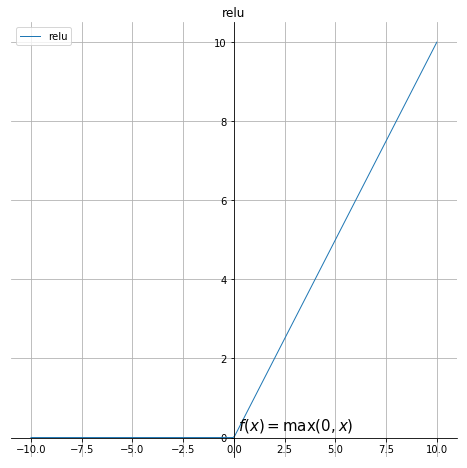

In [0]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$f(x)=\max (0, x)$'
activation = Relu(x)
EachFunctinGraph('relu', activation, eq);

### 4. Leaky Relu
---
> LeakyRelu는 Relu 함수 사용시 dying Relu 현상을 해결 하기한 함수이다.
* Relu는 입력 값이 0보다 작은경우 기울기가 0이 되지만, Leaky Relu는 작은 기울기를 부여함으로써 dying Relu문제를 방지한다.



In [0]:
def LeakyRelu(x):
    return np.maximum(x * 0.01, x)

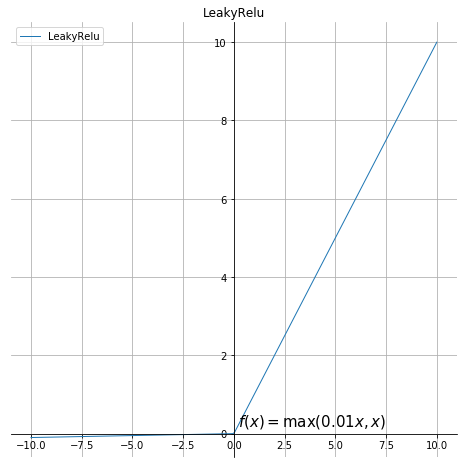

In [0]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$f(x)=\max (0.01 x, x)$'
activation = LeakyRelu(x)
EachFunctinGraph('LeakyRelu', activation, eq);

### 4. PRelu
---
> Leaky Relu와 비슷한 특징을 가지는 함수로 파라미터 alpha를 추가하여 입력 값이 0보다 작을 경우 학습 가능 하도록 만든 함수


In [0]:
def PRelu(x):
    alpha = 2
    return np.maximum(x * alpha, x)

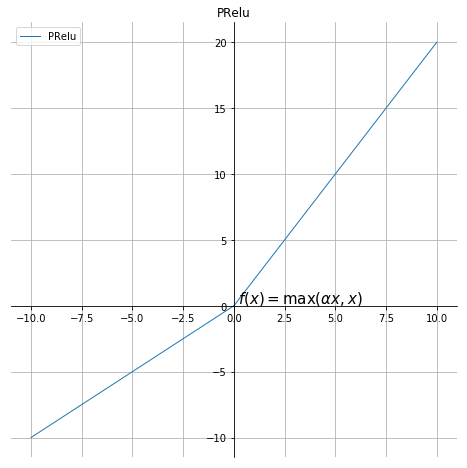

In [0]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$f(x)=\max (\alpha x, x)$'
activation = PRelu(x)
EachFunctinGraph('PRelu', activation, eq);

### 5. ELU
---
> ELU는 Relu의 threshold를 -1로 낮춘 함수를 exp^x를 이용하여 근사한 함수이다.
* Relu의 장점을 모두 포함
* dying Relu 문제 해결
* 출력값이 거의 zero-centered
* 단점으로 기존의 Relu계열의 함수와 달리 지수함수(exp) 연산이 필요하여 연산시간 많이 소요

In [0]:
def ELU(x):
    alpha = 2
    return np.maximum(0, x) + np.minimum(0, alpha * (np.exp(x) - 1))

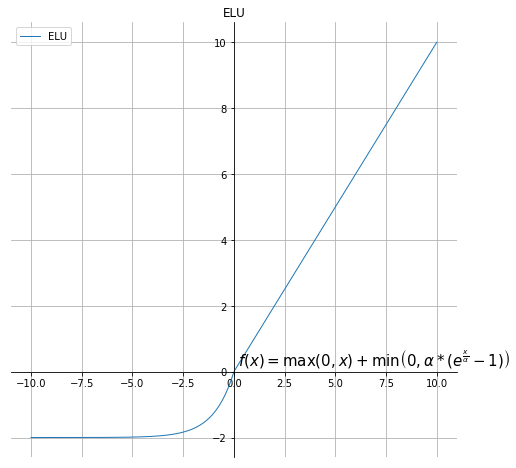

In [0]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$f(x)=\max (0, x)+\min \left(0, \alpha *\left(e^{\frac{x}{\alpha}}-1\right)\right)$'
activation = ELU(x)
EachFunctinGraph('ELU', activation, eq);

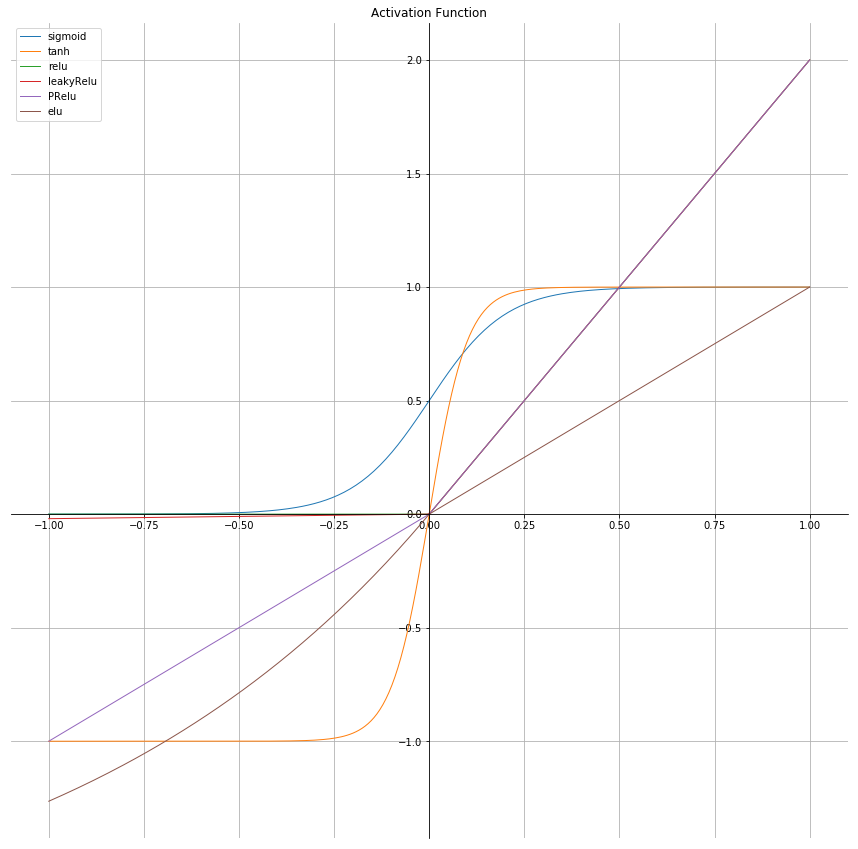

In [0]:
if __name__ == '__main__':
    x = np.linspace(-10, 10, 256, endpoint=True)
    sigmoid = Sigmoid(x)
    tanh = HyperbolicTangent(x)

    x = np.linspace(-2, 2, 256, endpoint=True)
    relu = Relu(x)
    leaky_relu = LeakyRelu(x)

    x = np.linspace(-1, 1, 256, endpoint=True)
    p_relu = PRelu(x)
    elu = ELU(x)

    '''
    Overall Activation Function Visualization
    '''
    MergeFunctionGraph(sigmoid=sigmoid, tanh=tanh, relu=relu, leakyRelu=leaky_relu, PRelu=p_relu, elu=elu)
    